In [20]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
global X_train, X_test, y_train, y_test
plt.rcParams["figure.figsize"] = (14,7)

def splitlist(list):
    list1 = []
    list2 = []
    for i in list:
        list1.append(i[0])
        list2.append(i[1])
    return list1, list2


def merge_shuffle(list1, list2):
    list = []
    for i in range(len(list1)):
        list.append(list1[i])
        list.append(list2[i])
    # random.shuffle(list)
    return list


def readfile(file):
    f = open(file, "r")
    result = []
    c = 0
    for i in f:
        if c <= 20000:
            # print(c)
            c += 1
            # print(c)
            list = []
            line = i[1:-3].split(", [")
            # print(line)
            list.append(int(line[0]))
            temp = []
            # print(list)
            for j in line[1].split(", "):
                if "." not in j:
                    temp.append(int(j))
                else:
                    temp.append(float(j))
            # print(temp)
            list.append(temp)
            # print("test")
            result.append(list)
    f.close()
    return result


def selectfeatures(features, indexs):
    result = []
    length = len(features[0])
    for w in features:
        temp = []
        for i in range(1, len(w)+1):
            if i in indexs:
                temp.append(w[i-1])
        result.append(temp)
    return result

def NPV(conf_mat):
    TN = conf_mat[0][0]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    TP = conf_mat[1][1]
    NPV = TN / (TN + FN)
    return NPV

def PPV(conf_mat):
    TN = conf_mat[0][0]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    TP = conf_mat[1][1]
    PPV = TP / (TP + FP)
    return PPV

def Scale():
    global X_train, X_test
    X_train_svm, X_test_svm = X_train, X_test
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_svm = scaler.transform(X_train)
    X_test_svm = scaler.transform(X_test)
    return X_train_svm, X_test_svm

def notglobalscale(X_train):
    X_train_svm= X_train
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_svm = scaler.transform(X_train)
    return X_train_svm

def Kbest(X_train_svm, X_test_svm, n):
    sel = SelectKBest(chi2, k=n)
    sel.fit(X_train_svm, y_train)
    # print(sel.scores_)
    X_train_svm = sel.transform(X_train_svm)
    X_test_svm = sel.transform(X_test_svm)
    return X_train_svm, X_test_svm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def LDA(n):
    X = Scale()
    X = Kbest(X[0], X[1], n)
    X_train_svm = X[0]
    X_test_svm = X[1]
    model = LinearDiscriminantAnalysis()
    model.fit(X_train_svm, y_train)
    y_pred = model.predict(X_test_svm)
    print("Accuracy LDA : ", metrics.accuracy_score(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    print("NPV : ", NPV(conf_mat))
    print("PPV : ", PPV(conf_mat))
    print(classification_report(y_test, y_pred))
    svc_disp = RocCurveDisplay.from_estimator(model, X_test_svm, y_test)
    plt.show()
    plotthreshold(model,X_test_svm)
    pplotthreshold(model,X_test_svm)
    scores = cross_val_score(model, features, labels)
    print(scores)

def KNN():
    X = Scale()
    X = Kbest(X[0], X[1], 48)
    X_train_svm = X[0]
    X_test_svm = X[1]
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)
    model.fit(X_train_svm,y_train)
    y_pred = model.predict(X_test_svm)
    print("Accuracy Knn : ", metrics.accuracy_score(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    print("NPV : ", NPV(conf_mat))
    print("PPV : ", PPV(conf_mat))
    print(classification_report(y_test, y_pred))
    svc_disp = RocCurveDisplay.from_estimator(model, X_test_svm, y_test)
    plt.show()
    plotthreshold(model,X_test_svm)
    pplotthreshold(model,X_test_svm)
    scores = cross_val_score(model, features, labels)
    print(scores)
    return metrics.accuracy_score(y_test, y_pred)

def MYSVM():
    X = Scale()
    X = Kbest(X[0], X[1], 52)
    X_train_svm = X[0]
    X_test_svm = X[1]
    #print("Training samples SVM: ", X_train_svm.shape)
    clf = svm.SVC(kernel='rbf', gamma=0.7, C=200, probability= True)
    print("traning...")
    clf.fit(X_train_svm, y_train)
    y_pred = clf.predict(X_test_svm)
    print("Accuracy linear SVM : ", metrics.accuracy_score(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    print("NPV : ", NPV(conf_mat))
    print("PPV : ", PPV(conf_mat))
    print(classification_report(y_test, y_pred))
    svc_disp = RocCurveDisplay.from_estimator(clf, X_test_svm, y_test)
    plt.show()
    plotthreshold(clf,X_test_svm)
    pplotthreshold(clf,X_test_svm)
    



def RandomForest(bol,n=54):
    t = idx[:n]
    print("traning...")
    rf_w = RandomForestClassifier(random_state=100, n_estimators=100)
    rf_w.fit(X_train, y_train)
    y_pred_rf_w = rf_w.predict(X_test)
    print("Accuracy Random Forest : ",
          metrics.accuracy_score(y_test, y_pred_rf_w))
    conf_mat = confusion_matrix(y_test, y_pred_rf_w)
    print("Confusion Matrix:")
    print(conf_mat)
    print("NPV : ", NPV(conf_mat))
    print("PPV : ", PPV(conf_mat))
    print(classification_report(y_test, y_pred_rf_w))
    
    # plot Importances
    #print("Confusion Matrix:")
    importances = rf_w.feature_importances_
    final_df = pd.DataFrame(
        {"Features": t, "Importances": importances})
    final_df.set_index('Importances')
    final_df = final_df.sort_values('Importances')
    plt.figure(figsize=(10, 3))
    plt.xticks(rotation=45)
    sns.barplot(x="Features", y="Importances", data=final_df)
    plt.show()
    svc_disp = RocCurveDisplay.from_estimator(rf_w, X_test, y_test)
    plt.show()
    plotthreshold(rf_w,X_test)
    pplotthreshold(rf_w,X_test)
    scores = cross_val_score(rf_w, features, labels)
    print(scores)
    if(bol):
        print("RFECV")
        sel_rfe_tree = RFECV(estimator=rf_w, step=1)
        print("traning...")
        X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
        y_pred_rf = sel_rfe_tree.predict(X_test)
        print("Accuracy Random Forest with RFECV : ",
              metrics.accuracy_score(y_test, y_pred_rf))
        print("Training Samples: ", X_train_rfe_tree.shape)
        print(sel_rfe_tree.get_support())
        print(sel_rfe_tree.grid_scores_)
        print(X_train_rfe_tree.shape)
        print(sel_rfe_tree.ranking_)
        
        conf_mat = confusion_matrix(y_test, y_pred_rf)
        print("Confusion Matrix:")
        print(conf_mat)
        print(classification_report(y_test, y_pred_rf))


def RFRFECV():
    model_tree = RandomForestClassifier(n_estimators=100, random_state=100)
    print("RFECV")
    sel_rfe_tree = RFECV(estimator=model_tree, step=1)
    print("traning...")
    X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
    print("Training Samples: ", X_train_rfe_tree.shape)
    print(sel_rfe_tree.get_support())
    print(sel_rfe_tree.grid_scores_)
    print(X_train_rfe_tree.shape)
    print(sel_rfe_tree.ranking_)
    y_pred_rf = sel_rfe_tree.predict(X_test)
    print("Accuracy Random Forest with RFECV : ",
          metrics.accuracy_score(y_test, y_pred_rf))
    conf_mat = confusion_matrix(y_test, y_pred_rf)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred_rf))
    model_tree.fit(X_train_rfe_tree,y_train)
    importances = model_tree.feature_importances_
    final_df = pd.DataFrame(
        {"Features": idx[:43], "Importances": importances})
    final_df.set_index('Importances')
    final_df = final_df.sort_values('Importances')
    plt.figure(figsize=(10, 3))
    plt.xticks(rotation=45)
    sns.barplot(x="Features", y="Importances", data=final_df)
    plt.show()

from sklearn.neural_network import MLPClassifier
def MLP():
    classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
    X = Scale()
    X = Kbest(X[0], X[1], 49)
    X_train_svm = X[0]
    X_test_svm = X[1]
    print('Training..')
    
    classifier.fit(X_train_svm, y_train)
    y_pred = classifier.predict(X_test_svm)
    print("Accuracy MLP: ", metrics.accuracy_score(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    print("NPV : ", NPV(conf_mat))
    print(classification_report(y_test, y_pred))
    svc_disp = RocCurveDisplay.from_estimator(classifier, X_test_svm, y_test)
    plt.show()
    plotthreshold(classifier,X_test_svm)
    pplotthreshold(classifier,X_test_svm)
    #scores = cross_val_score(classifier, features, labels)
    #print(scores)

def plotthreshold(rf_w,X_test):
    thresholds = []
    acc=[]
    npvs=[]
    temp=0
    temp2=0
    threshold = 0.1
    while(threshold <= 0.5):
          predicted_proba = rf_w.predict_proba(X_test)
          predicted = (predicted_proba [:,1] >= threshold).astype('int')
          accuracy = metrics.accuracy_score(y_test, predicted)
          conf_mat = confusion_matrix(y_test, predicted)
          npv=NPV(conf_mat)
          acc.append(accuracy)
          npvs.append(npv)
          y=acc
          thresholds.append(float(f"{threshold:.3f}"))
          threshold+=0.05
    plt.rcParams["figure.figsize"] = (14,7)
    x=np.arange(len(thresholds))
    ax = plt.subplot(111)
    ax.bar(x-0.2, acc, width=0.3, color='b', align='center', label="Accuracy")
    ax.bar(x+0.2, npvs, width=0.3, color='r', align='center', label="NPV")
    plt.xticks(x, thresholds)
    for index, value in enumerate(acc):
        plt.text(x[index]-0.4, value+0.01, str(float(f"{value:.3f}")))
    for index, value in enumerate(npvs):
        plt.text(x[index], value+0.02, str(float(f"{value:.3f}")))
    plt.legend()
    plt.show()


def pplotthreshold(rf_w,X_test):
    thresholds = []
    acc=[]
    npvs=[]
    temp=0
    temp2=0
    threshold = 0.5
    while(threshold <= 1):
          predicted_proba = rf_w.predict_proba(X_test)
          predicted = (predicted_proba [:,1] >= threshold).astype('int')
          accuracy = metrics.accuracy_score(y_test, predicted)
          conf_mat = confusion_matrix(y_test, predicted)
          npv=PPV(conf_mat)
          acc.append(accuracy)
          npvs.append(npv)
          y=acc
          thresholds.append(float(f"{threshold:.3f}"))
          threshold+=0.05
    plt.rcParams["figure.figsize"] = (14,7)
    x=np.arange(len(thresholds))
    ax = plt.subplot(111)
    ax.bar(x-0.2, acc, width=0.3, color='b', align='center', label="Accuracy")
    ax.bar(x+0.2, npvs, width=0.3, color='r', align='center', label="PPV")
    plt.xticks(x, thresholds)
    for index, value in enumerate(acc):
        plt.text(x[index]-0.4, value+0.01, str(float(f"{value:.3f}")))
    for index, value in enumerate(npvs):
        plt.text(x[index], value+0.02, str(float(f"{value:.3f}")))
    plt.legend()
    plt.show()


idx = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
mal = splitlist(readfile("malfeatures.txt"))
beg = splitlist(readfile("begfeatures.txt"))
features = merge_shuffle(mal[1], beg[1])
labels = merge_shuffle(mal[0], beg[0])
#features = selectfeatures(features, indexes)
features = np.array(features)
print("Number of samples", len(features))

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=109)
print("Shape of samples", X_train.shape)

var_thr = VarianceThreshold(threshold=0.0)
X_train = var_thr.fit_transform(X_train)
X_test = var_thr.fit_transform(X_test)
print("Traning samples", X_train.shape)
print("Testing Samples: ", X_test.shape)

Number of samples 20000
Shape of samples (14000, 54)
Traning samples (14000, 52)
Testing Samples:  (6000, 52)


Number of samples 20000
Shape of samples (14000, 855)
Traning samples (14000, 855)
Testing Samples:  (6000, 855)
Training..
Accuracy MLP:  0.913
Confusion Matrix:
[[2796  254]
 [ 268 2682]]
NPV :  0.912532637075718
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3050
           1       0.91      0.91      0.91      2950

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



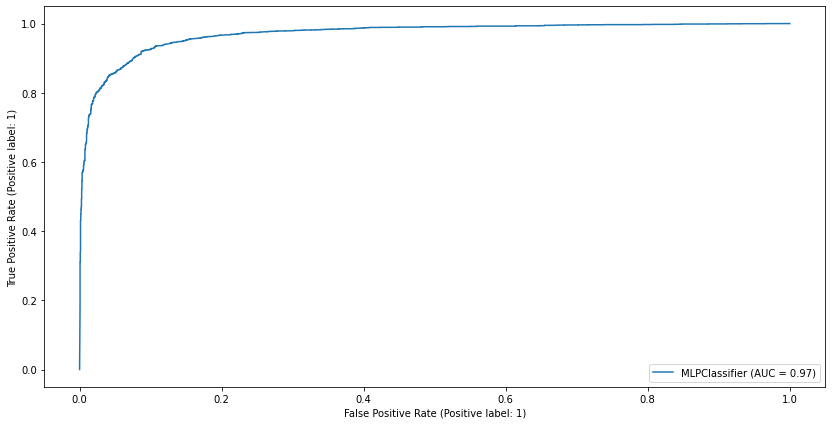

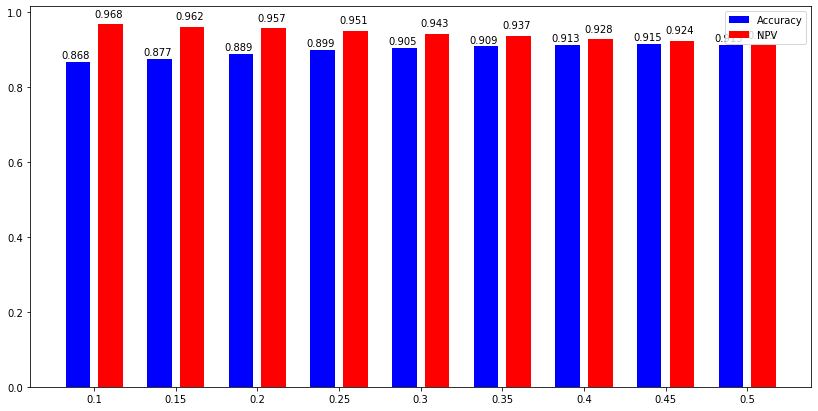

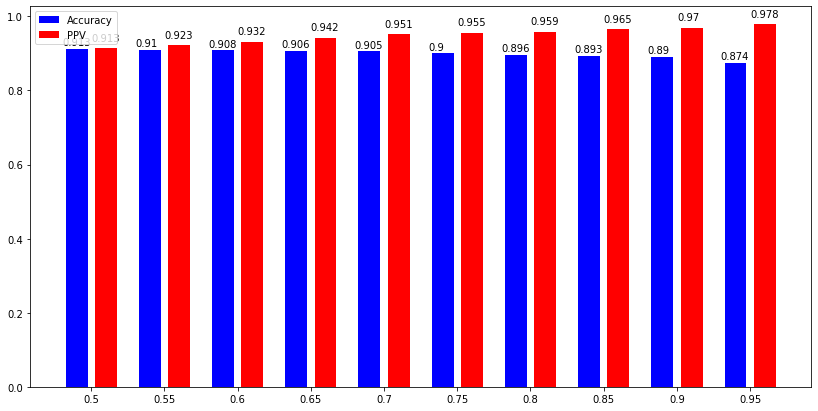

In [19]:
w = splitlist(readfile("tokens.txt"))
features = w[1]
labels =w[0]
#features = selectfeatures(features, indexes)
features = np.array(features)
print("Number of samples", len(features))

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=109)
print("Shape of samples", X_train.shape)

var_thr = VarianceThreshold(threshold=0.0)
X_train = var_thr.fit_transform(X_train)
X_test = var_thr.fit_transform(X_test)
print("Traning samples", X_train.shape)
print("Testing Samples: ", X_test.shape)

MLP()


In [ ]:
X = notglobalscale(features, labels)
X = Kbest(X[0], X[1], 52)
X_train_svm = X[0]
X_test_svm = X[1]
#print("Training samples SVM: ", X_train_svm.shape)
clf = svm.SVC(kernel='rbf', gamma=0.7, C=200, probability= True)
print("traning...")
clf.fit(X_train_svm, y_train)
y_pred = clf.predict(X_test_svm)
print("Accuracy linear SVM : ", metrics.accuracy_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)
print("NPV : ", NPV(conf_mat))
print("PPV : ", PPV(conf_mat))
print(classification_report(y_test, y_pred))

scores = cross_val_score(clf, XSVM, YSVM)
print(scores)

traning...
Accuracy linear SVM :  0.9233333333333333
Confusion Matrix:
[[2883  167]
 [ 293 2657]]
NPV :  0.9077455919395466
PPV :  0.9408640226628895
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3050
           1       0.94      0.90      0.92      2950

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



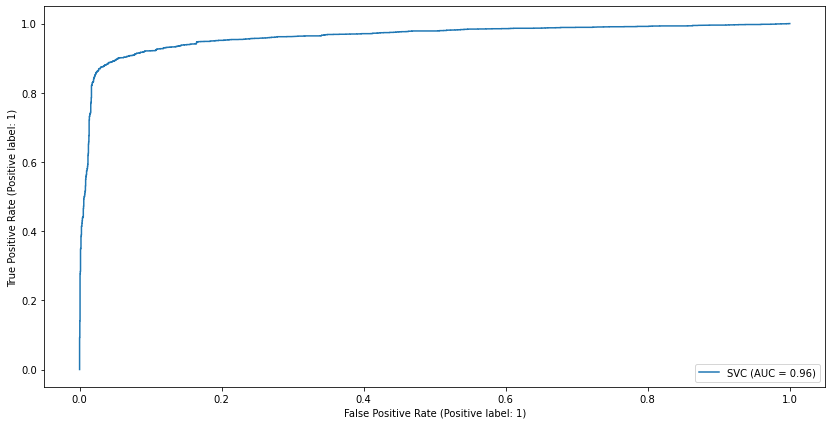

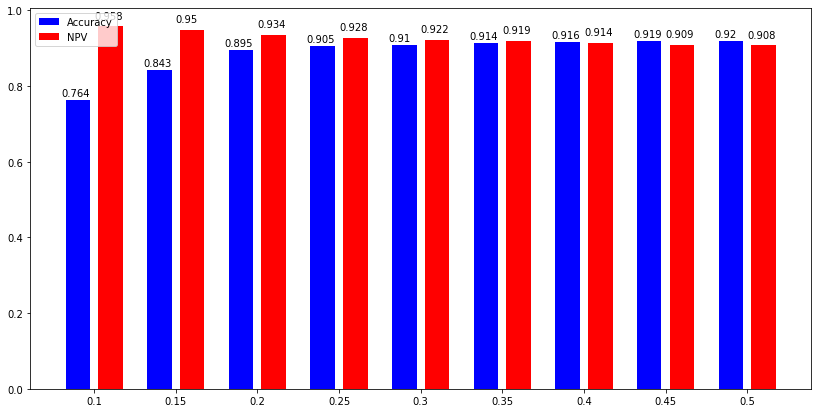

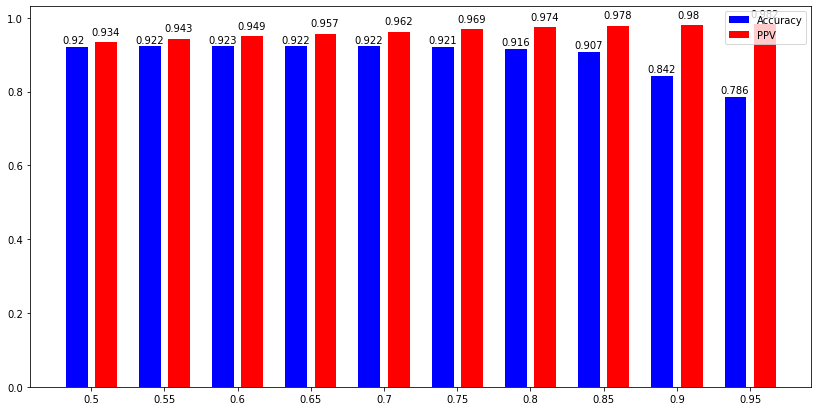

[0.769   0.76225 0.76025 0.7675  0.759  ]


In [9]:

MYSVM()

traning...
Accuracy Random Forest :  0.9478333333333333
Confusion Matrix:
[[2929  121]
 [ 192 2758]]
NPV :  0.9384812560076898
PPV :  0.9579715178881556
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3050
           1       0.96      0.93      0.95      2950

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



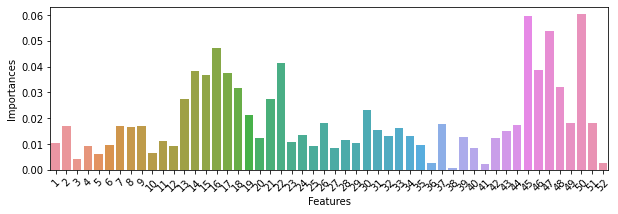

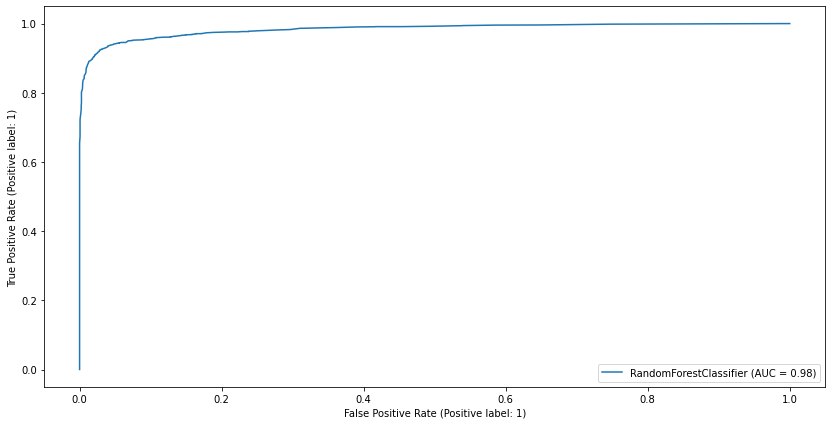

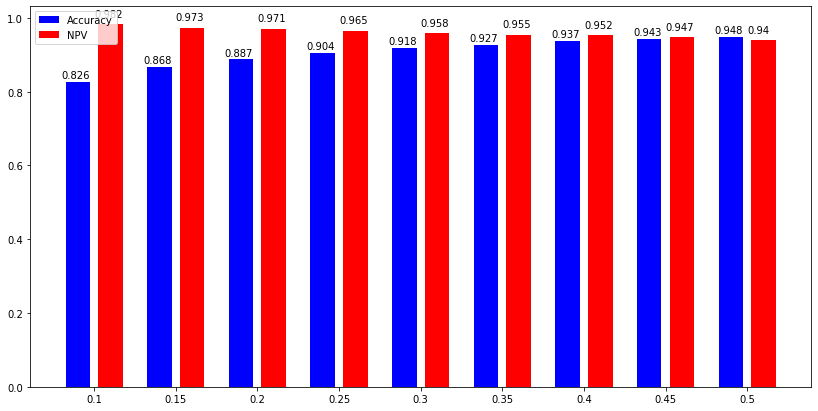

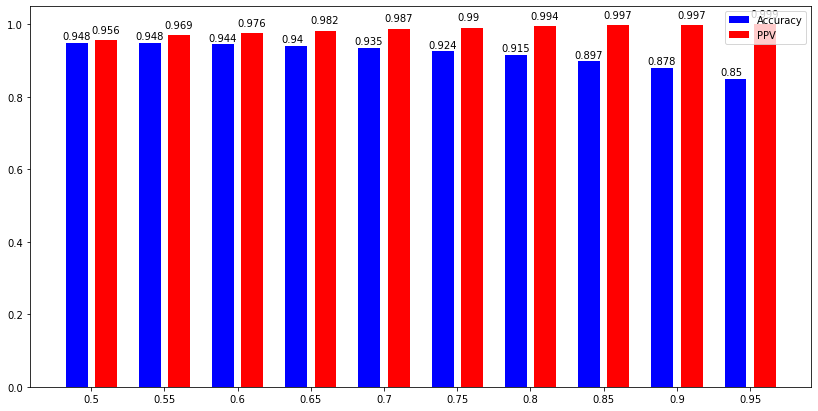

[0.9485  0.9435  0.94225 0.9495  0.94225]


In [10]:
nf = 52
bol=False
RandomForest(bol,n=nf)

Training..
Accuracy MLP:  0.9301666666666667
Confusion Matrix:
[[2930  120]
 [ 299 2651]]
NPV :  0.9074016723443791
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3050
           1       0.96      0.90      0.93      2950

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



c:\Users\moham\OneDrive\Desktop\malware\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


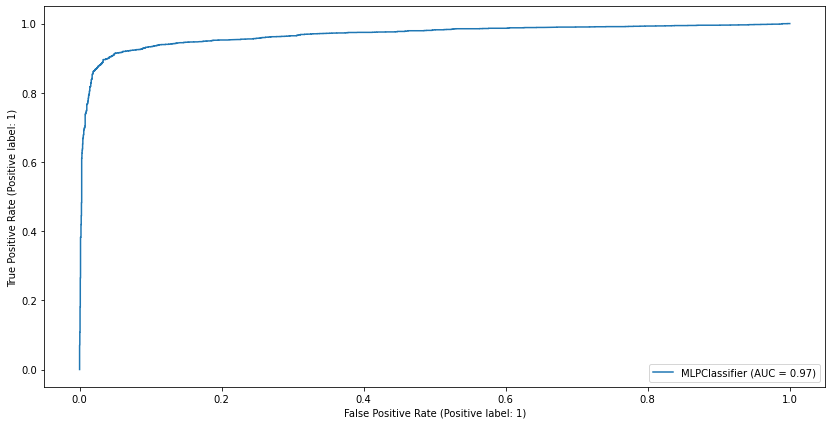

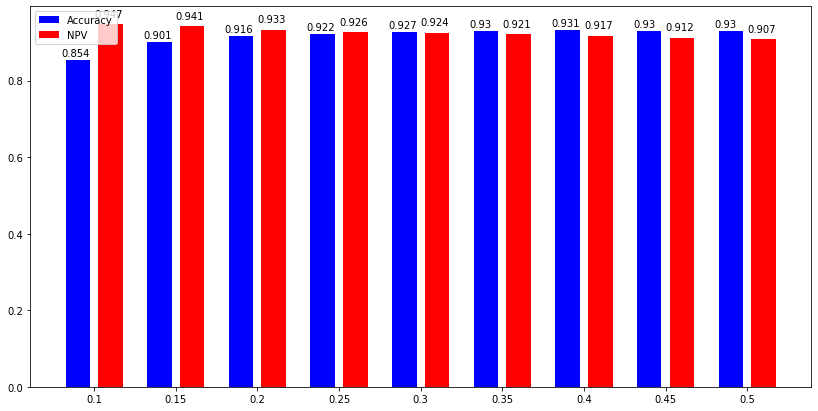

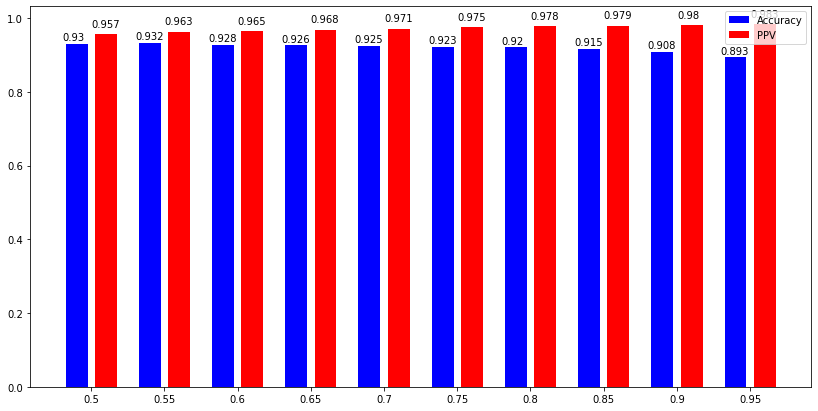

In [11]:

MLP()

Accuracy Knn :  0.9205
Confusion Matrix:
[[2808  242]
 [ 235 2715]]
NPV :  0.9227735787052251
PPV :  0.9181602975989178
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3050
           1       0.92      0.92      0.92      2950

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



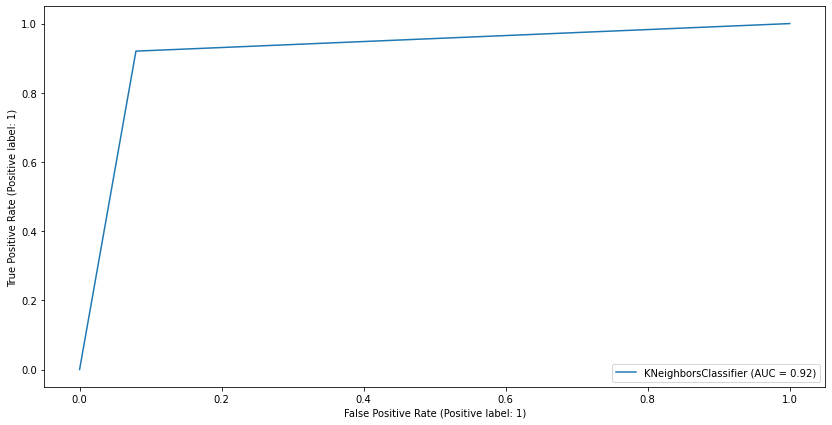

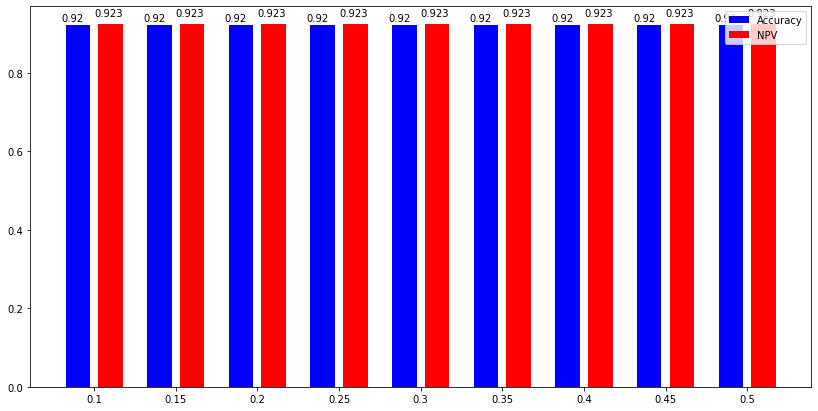

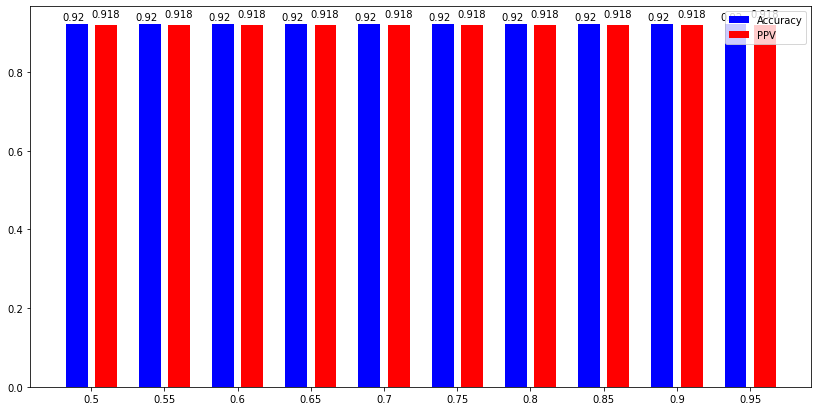

[0.883  0.8875 0.88   0.8895 0.883 ]


0.9205

In [6]:
KNN()

Accuracy LDA :  0.8691666666666666
Confusion Matrix:
[[2746  304]
 [ 481 2469]]
NPV :  0.8509451502943911
PPV :  0.8903714388748648
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3050
           1       0.89      0.84      0.86      2950

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



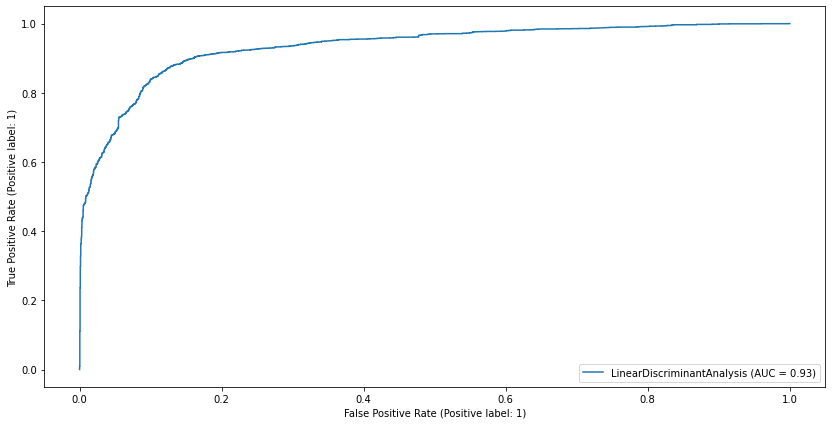

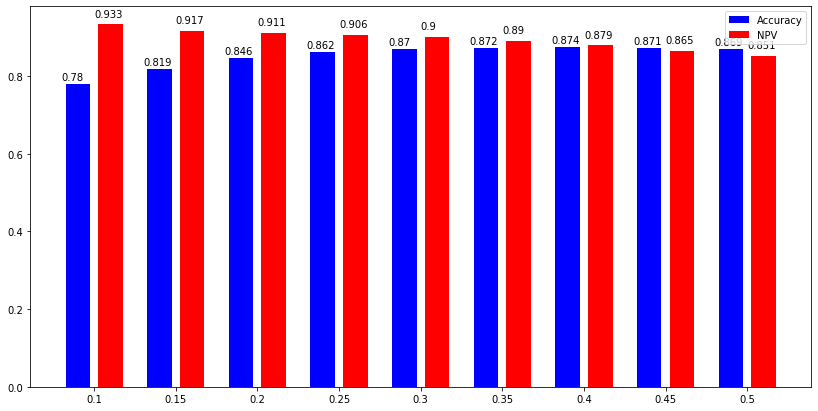

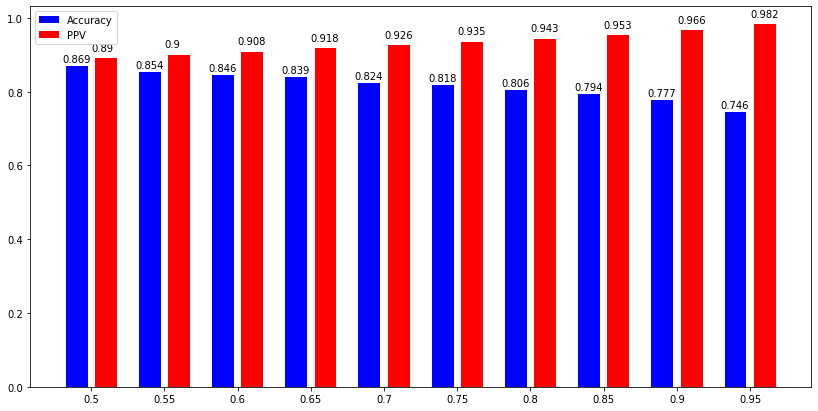

In [9]:
LDA(49)

In [7]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBRegressor(), features, labels)
print(scores)

[0.81108512 0.80157739 0.80535556 0.80970144 0.80550249]


RFECV
traning...
Training Samples:  (14000, 43)
[ True  True False  True False  True  True  True  True False  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True False  True False False  True  True  True  True  True  True  True
  True  True  True False]
[[0.72785714 0.73214286 0.74392857 0.73285714 0.74821429]
 [0.82857143 0.81678571 0.83       0.83821429 0.84      ]
 [0.87535714 0.86035714 0.88107143 0.88428571 0.87321429]
 [0.88535714 0.87321429 0.88678571 0.895      0.88321429]
 [0.89214286 0.88178571 0.8875     0.90321429 0.89321429]
 [0.91321429 0.91071429 0.90678571 0.915      0.91285714]
 [0.92107143 0.92107143 0.90785714 0.91357143 0.91821429]
 [0.9225     0.92464286 0.90642857 0.91964286 0.925     ]
 [0.92321429 0.92357143 0.91428571 0.93       0.92642857]
 [0.91857143 0.92892857 0.92071429 0.92892857 0.92785714]
 [0.92392857 0.92857143 0.925      0.92964286 0.9275  

c:\Users\moham\OneDrive\Desktop\malware\env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


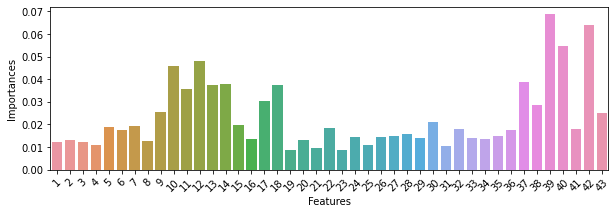

In [81]:
RFRFECV()